In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost
%pip install openpyxl
%pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgr


# FASE 1: COMPRENSIÓN DEL NEGOCIO


# Caso Banco “Monopoly/Dormammu”
El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente ha sido adquirido por un Banco con capitales extranjeros
llamado “Dormammu”. Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su
comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos
hacen de sus productos financieros.
Los ingenieros del área informática del banco Monopoly han extraído una base de datos según una solicitud recibida por el nuevo dueño del banco y
la han compartido con los ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra de clientes con 12 meses de
información almacenada en variables mensuales por cada cliente.
Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que
sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes,
preparar una estrategia y abordar a este nuevo mercado.
La base de datos tiene variables asociadas a información del cliente y variables mensuales, es decir una por cada mes, el cliente no se repite y las
variables asociadas se van agregando como una columna más. Con esto, la base de datos tiene 574 variables y 51.124 registros.

Nuestros principales objetivos son:
1. Analizar el comportamiento de los clientes
2. Detectar patrones en el uso de productos financieros
3. Desarrollar estrategias para el nuevo mercado

# FASE 2: COMPRENSIÓN DE LOS DATOS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Leer el archivo Excel
df = pd.read_excel('monopoly.xlsx', skiprows=1)

# Verificar los nombres de las columnas
print("Nombres de columnas: ")
print(df.columns.tolist())

# Mostrar las primeras filas
df.head()

Nombres de columnas después de la limpieza:
['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgA

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 575 entries, Id to Unnamed: 574
dtypes: float64(509), int64(53), object(13)
memory usage: 224.3+ MB


In [16]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

Dimensiones del dataset: (51124, 575)

Tipos de datos:
Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
                 ...   
UsoL2_T01         int64
UsoLI_T01       float64
IndRev_T01       object
target            int64
Unnamed: 574    float64
Length: 575, dtype: object


In [13]:
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,0.000000,NaN
25%,12781.750000,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,0.000000,NaN
50%,25562.500000,170.000000,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,0.000000,NaN
75%,38343.250000,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,0.000000,NaN
max,51124.000000,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,2.072818e+06,8.697782e+06,4.219680e+06,6.911556e+06,3929.810000,6.911556e+06,1.178549e+07,3929.810000,1.000000,NaN


In [14]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
                ...  
UsoL2_T01           0
UsoLI_T01           0
IndRev_T01          0
target              0
Unnamed: 574    51124
Length: 575, dtype: int64


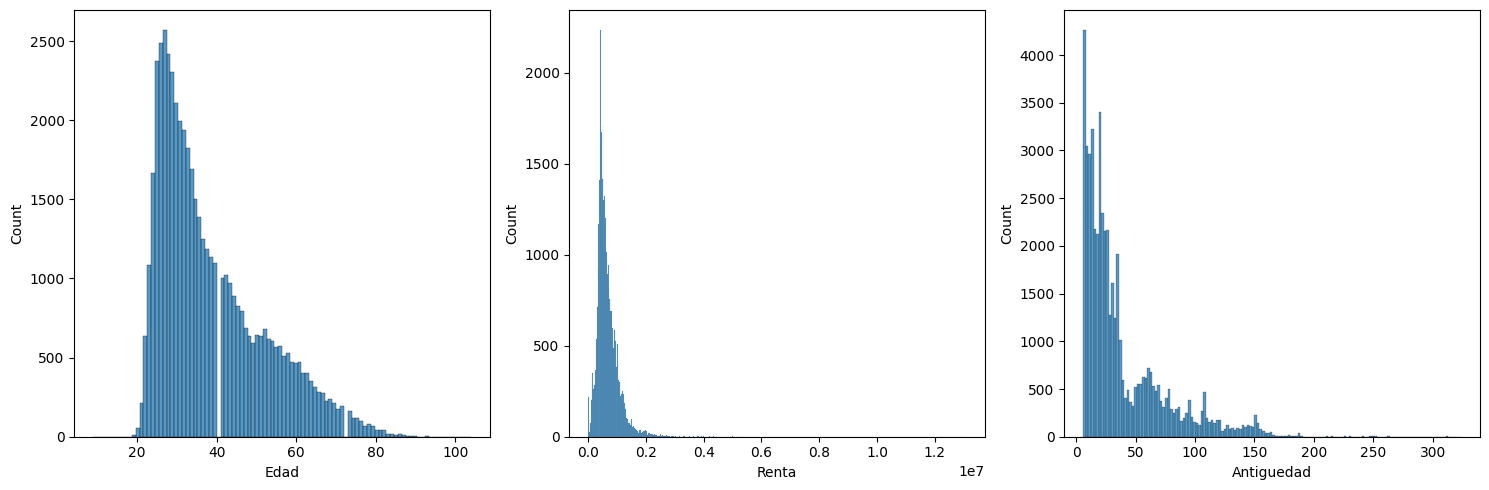

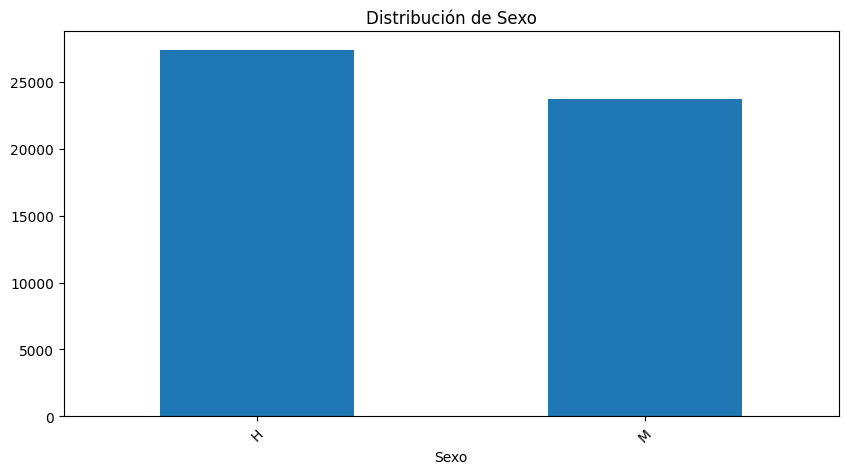

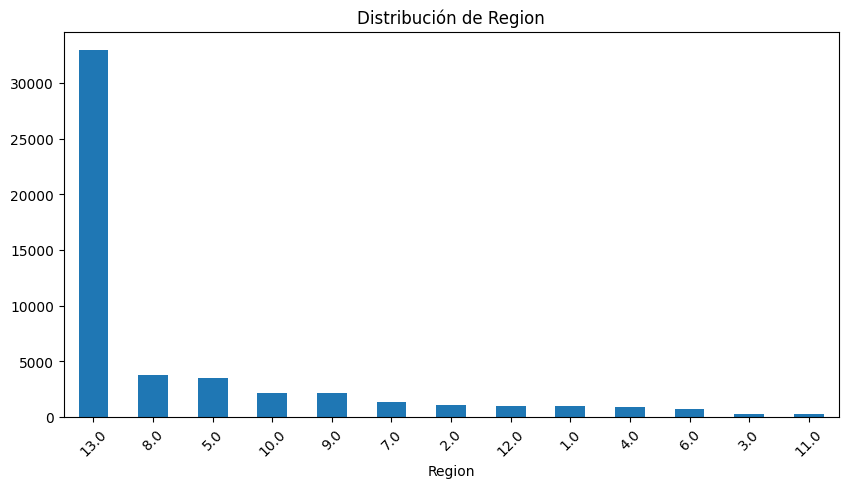

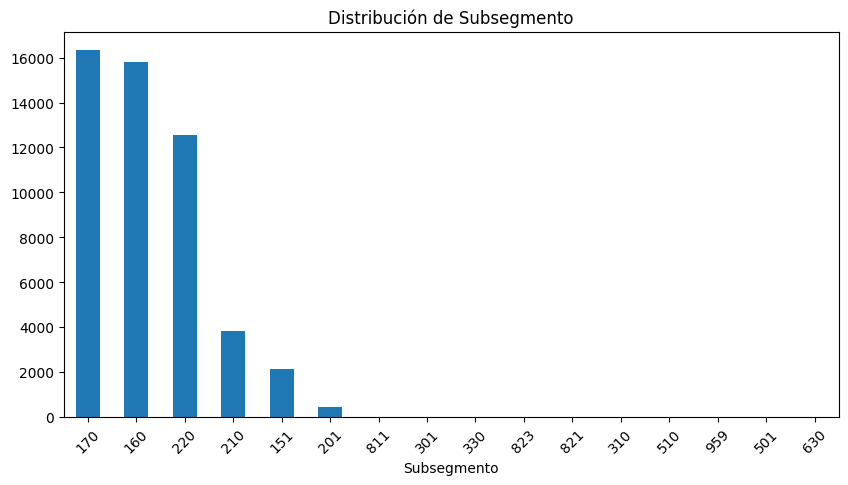

In [15]:
# Distribución de variables numéricas principales
variables_numericas = ['Edad', 'Renta', 'Antiguedad']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(variables_numericas):
    sns.histplot(data=df, x=var, ax=axes[i])
plt.tight_layout()
plt.show()

# Análisis de variables categóricas
variables_categoricas = ['Sexo', 'Region', 'Subsegmento']
for var in variables_categoricas:
    plt.figure(figsize=(10, 5))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)
    plt.show()